In [1]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

llm = ChatOpenAI()

In [2]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
  """
  State 클래스는 TypedDict를 상속받습니다.

  속성:
    messages (Annotated[list[str], add_messages]): 메시지들은 "list" 타입을 가집니다.
    'add_messages' 함수는 이 상태 키가 어떻게 업데이트되어야 하는지 정의한다.
    (이 경우, 메시지를 덮어쓰는 대신 리스트에 추가한다.)
  """
  messages: Annotated[list[str], add_messages]


graph_builder = StateGraph(State)

In [3]:
def generate(state: State):
  """
  주어진 상태를 기반으로 챗봇의 응답 메시지를 생성한다.

  매개변수:
    state (State): 현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있다.

  반환값:
    dict: 모델이 생성한 응답 메시지를 포함하는 딕셔너리.
          형식은 {"messages": [응답 메시지]}입니다.
  """
  return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("generate", generate)

In [4]:
graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

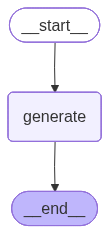

In [5]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [6]:
response = graph.invoke({"messages": ["안녕하세요! 저는 장연식입니다."]})

print(type(response))
response

<class 'langgraph.pregel.io.AddableValuesDict'>


{'messages': [HumanMessage(content='안녕하세요! 저는 장연식입니다.', additional_kwargs={}, response_metadata={}, id='381bcf19-d00f-4b2b-bc4b-fe034710adc3'),
  AIMessage(content='반가워요, 장연식님! 무엇을 도와드릴까요? :)', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 23, 'total_tokens': 54, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--c9f54d5d-6cba-4ad8-862b-5f95310be0d9-0', usage_metadata={'input_tokens': 23, 'output_tokens': 31, 'total_tokens': 54, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [8]:
response["messages"].append("제 이름을 아시나요?")
graph.invoke(response)

{'messages': [HumanMessage(content='안녕하세요! 저는 장연식입니다.', additional_kwargs={}, response_metadata={}, id='381bcf19-d00f-4b2b-bc4b-fe034710adc3'),
  AIMessage(content='반가워요, 장연식님! 무엇을 도와드릴까요? :)', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 23, 'total_tokens': 54, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--c9f54d5d-6cba-4ad8-862b-5f95310be0d9-0', usage_metadata={'input_tokens': 23, 'output_tokens': 31, 'total_tokens': 54, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content='제 이름을 아시나요?', additional_kwargs={}, response_metadata={}, id='21ac3890-8cc6-4478-bfa9-57bed4b

In [9]:
inputs = {"messages": [("human", "NBA의 전망에 대해 알려 줘.")]}
for chunk, _ in graph.stream(inputs, stream_mode="messages"):
  print(chunk.content, end="")

NBA는 현재 전 세계적으로 가장 인기 있는 농구 리그 중 하나로 손꼽힙니다. NBA는 세계적으로 유명한 선수들이 많이 활약하는데, 이는 농구 팬들에게 끊임없는 흥미와 재미를 제공합니다. 또한, NBA는 다양한 팀들이 경쟁력을 갖추고 있어 예측불허의 결과가 많이 발생하는데, 이러한 예측불허의 결과가 팬들에게 더욱 매력적인 요소로 작용합니다.

특히 최근 몇 시즌 동안은 골든 스테이트 워리어스, 클리블랜드 캐벌리어스, 토론토 랩터스, 밀워키 버크스 등의 강팀들이 무대를 장악하고 있으며, 이들의 경쟁이 치열하게 이어지고 있습니다. 또한, 신인들의 발전과 베테랑 선수들의 활약도 눈에 띄며, 앞으로의 NBA는 더욱 놀라운 이야기와 결과가 기대되고 있습니다.

최근 코로나19의 영향으로 일정이 변동되고 무관중 경기가 이어지는 등의 어려움이 있었지만, NBA는 이를 극복하며 팬들에게 농구의 즐거움을 전달하기 위해 노력하고 있습니다. 따라서 앞으로의 NBA는 더욱 발전하고 성장할 것으로 기대되며, 팬들은 더욱 흥미진진한 시즌을 기대할 수 있을 것입니다.